In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from collections import defaultdict

In [20]:
data = defaultdict(dict)
for size in [400]:
    for quality in (2, 4, 6, 8, 10):
        with open(f'/home/michal/h4h_team5/model/results/result_{size}_gaussblur_{quality}.pickle', 'rb') as fin:
            data[size][quality] = pickle.load(fin)

In [21]:
for d in data.keys():
    for k in data[d].keys():
        for t in ('train', 'val'):
            tmp = []
            for i, cmat in enumerate(data[d][k]['cmats'][t]):
                tmp.append(np.diag(cmat).sum() / np.sum(cmat))
            data[d][k]['accs'][t] = tmp

In [22]:
data[d][k].keys()

dict_keys(['cmats', 'losses', 'accs', 'b_loss', 'b_acc', 'prec', 'rec', 'f1', 'prec_avg', 'rec_avg', 'f1_avg'])

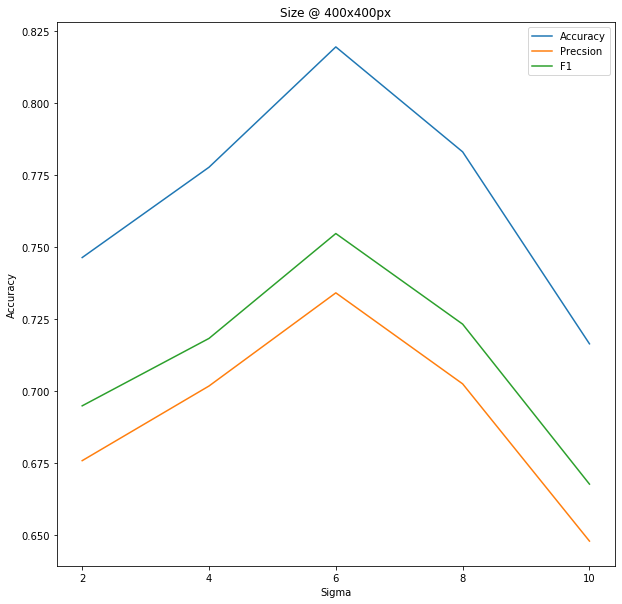

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharey=True)
axes = [axes]

for i, d in enumerate(data.keys()):
    x = []
    ys = []
    for k in data[d].keys():
        x.append(k)
        ys.append([#data[d][k]['accs']['val'][-1],
                   data[d][k]['prec_avg']['val'][-1],
                   data[d][k]['rec_avg']['val'][-1],
                   data[d][k]['f1_avg']['val'][-1]])
    ax = axes[i]
    ys = np.array(ys).T    
    for name, y in zip(['Accuracy', 'Precsion', 'F1'], ys):
        ax.plot(x, y, label=name)
    ax.set_xticks([2, 4, 6, 8, 10])
    ax.set_xlabel('Sigma')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Size @ {d}x{d}px')
    ax.legend()
fig.savefig('blur.png', bbox_inches='tight')

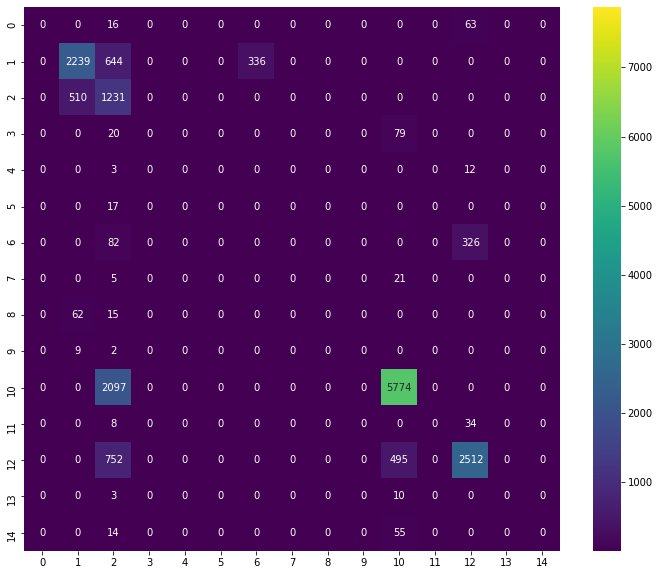

In [65]:
d = data[k]['cmats']['val'][-1]
#d = d / d.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(d, cmap='viridis', vmin=np.sum(d, axis=1).min(),
            vmax=np.sum(d, axis=1).max(), ax=ax, annot=True, fmt='d')

In [108]:
data[k]['f1_avg']['val']

[0.7761588998916648,
 0.7682110410909584,
 0.7449319783500477,
 0.7581149353751608,
 0.7414145214628687,
 0.7313606911369348,
 0.7141909069946863,
 0.7083645676824161,
 0.713828174803281,
 0.6993972997740068]

In [76]:
cmat = data['cmats']['val'][-1]

In [77]:
import numpy as np

In [78]:
np.diag(cmat).sum() / np.sum(cmat)

0.6485727387366732